In [2]:
import os
import matplotlib as mpl
import numpy as np
import pandas as pd
from scipy import stats

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from astropy.table import Table
from astropy.table import join
from astropy.table import Column
import seaborn as sns

In [3]:
os.chdir(r'../Data')

Reading the Mophological and kinematical table

In [4]:
mk = Table.read('Q-ref.csv', format = 'ascii')
# mk = Table.read('Q_Recal-L0025N0752.csv', format = 'ascii')
mk

GalaxyID,DMEllipticity,DiscToTotal,DispAnisotropy,Ellipticity,KappaCoRot,MedOrbitCircu,RotToDispRatio,Triaxiality,GalaxyID_1,ApertureSize,Mass_BH,Mass_DM,Mass_Gas,Mass_Star,VelDisp,SFR,GalID,MasaANegroSubGrid,AcrecionMasaANegro,Masa,MasaMateriaOscura,MasaGas,MasaEstrella,MasaANegro
int64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64
3226889,0.3736355400025354,0.053234520237536054,0.12762756569297418,0.2581218583511655,0.17711417162906362,0.0359092699554268,0.07426425178269415,0.731467244468864,3226889,30,3746210.5,47137317000.0,501801824.0,836548800.0,38.6588,0.055242997,3414,312751.16,3.3191096e-11,135158227000.0,132269515000.0,2034051580.0,850906240.0,3746210.5
5692534,0.3794680042597731,0.5923038422910913,0.15610793754870333,0.5994417898268398,0.43611017551809483,0.5020079041591864,1.1094982352667728,0.6340122442633017,5692534,30,1817607.5,11847346200.0,3186315520.0,402029440.0,28.180422,0.16878024,16957,152797.53,1.1860476e-08,29440280600.0,23684997100.0,5344727000.0,408738368.0,1817607.5
5728920,0.16199965543987083,0.2052219432748401,0.20027541288396222,0.2331522907290403,0.25826545182858085,0.14815552853321978,0.26710337487469393,0.2591651906077923,5728920,30,3630739.8,39546094000.0,86007336.0,954341060.0,42.532383,0.03533982,17211,444080.88,1.4673017e-06,56552276000.0,55504142000.0,86007336.0,958500740.0,3630739.8
10341428,0.22522403443200856,0.20635552541214863,0.13167903604289888,0.2769320448517646,0.2583036216935493,0.10033628913315595,0.24901868995134674,0.03835321337897442,10341428,30,7235433.0,88699978000.0,5952936400.0,3666815740.0,57.195385,0.5762099,2177,1307260.1,0.00045662734,660009320000.0,630488240000.0,25563289600.0,3946914050.0,10851339.0
12566238,0.39665930847987885,0.20231774499123112,0.3824629714473129,0.27186338506935526,0.37057332768210016,0.08536075303010761,0.20290823324391466,0.513724204940099,12566238,30,3615906.0,49454432000.0,207088736.0,813815230.0,47.149002,0.04838007,5300,346079.7,2.3803817e-05,179146932000.0,175577301000.0,2718052100.0,847986430.0,3615906.0
12569982,0.28957023910450475,0.07570525759439017,0.1266082892155065,0.29978039579093707,0.17969222509478536,0.051459490412017334,0.08959003605834988,0.5920203874224141,12569982,30,5574286.0,56434860000.0,314128288.0,546877820.0,39.297363,0.019524526,5311,471089.9,6.538812e-08,180827668000.0,177884692000.0,2371427580.0,565968960.0,5574286.0
12574144,0.2919201561617659,0.491544657813621,0.44694888301122293,0.5635520302420358,0.45334905326890007,0.400614675196549,0.7723461995507785,0.2122303023083452,12574144,30,3616160.5,73711436000.0,582484930.0,2220375810.0,51.5068,0.17847331,5323,765086.1,8.4485544e-07,253882925000.0,247679336000.0,3914793730.0,2283316740.0,5489157.5
12606457,0.3074881813724145,0.0709485417110457,-0.12707574753903073,0.2799876271616091,0.17633480222434897,0.033857167575799874,0.09930474211793842,0.06920872640459172,12606457,30,7245858.5,72771019000.0,622325310.0,2139672580.0,45.1679,0.0764098,5407,854483.75,2.1839597e-08,243127550000.0,236879086000.0,4078521340.0,2162742020.0,7245858.5
12609333,0.3580841248060661,0.09512776790262889,0.04490844649078729,0.1854569078842485,0.17561924751786076,0.07544455318729065,0.12800097449976852,0.7294852707782951,12609333,30,1876768.1,50598445000.0,352582656.0,909681540.0,36.18689,0.096991055,5414,162968.58,3.2437117e-07,150647734000.0,147345310000.0,2376025600.0,924526720.0,1876768.1


Reading table of luminosities

In [5]:
lu = Table.read('total_luminosities_frac_RECA.csv', format ='ascii')
lu

GalID,Sim,logLCII,logLNII_205,logLNII_122,logLOI_145,logLOIII_88,logLNIII_57,frac_LdiffCII,frac_LMolCII,frac_LPDRCII,frac_LdiffNII_205,frac_LMolNII_205,frac_LPDRNII_205,frac_LdiffNII_122,frac_LMolNII_122,frac_LPDRNII_122,frac_LdiffOI_145,frac_LMolOI_145,frac_LPDROI_145,frac_LdiffOIII_88,frac_LMolOIII_88,frac_LPDROIII_88,frac_LdiffNIII_57,frac_LMolNIII_57,frac_LPDRNIII_57
float64,str6,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
11.0,Ref100,8.450187634229371,7.5256145616261705,7.332794018805233,6.499519055846627,6.394487963631868,5.817649210359375,0.987002716233387,0.00990546392992681,0.0030918198366862728,0.9999963190603157,7.557441594510448e-07,2.925195524831787e-06,0.9999992445660637,4.45207998742248e-07,3.1022593748730607e-07,0.9204456930395319,0.06788592255370686,0.011668384406761073,0.9999999963251491,3.177314120590883e-10,3.357119519306777e-09,0.9999999928222202,1.3904815010627536e-09,5.787298477817435e-09
6.0,Ref100,8.408184353712917,7.495340931392728,7.241338972536405,6.276553499541244,6.476954508915274,5.904120415425211,0.993129758182585,0.0038453358926621804,0.003024905924752824,0.9999951955657519,5.355900374121044e-07,4.268844210711886e-06,0.9999990917477025,2.0789451729536027e-07,7.003577802279861e-07,0.9353641405105333,0.0539674095850742,0.010668449904392549,0.9999999482991668,1.0060185851745217e-10,5.160023123639024e-08,0.9999999353467078,4.987987328872081e-10,6.415449348247119e-08
1.0,Ref100,8.881598281842457,7.998023008500145,7.742776555174997,6.699711844674182,6.9741835146126645,6.4130227940866025,0.9975208660738744,0.0010407897151010898,0.0014383442110245462,0.9999972274864428,5.653714855683894e-07,2.2071420715571637e-06,0.999999277592571,1.0407877286333105e-07,6.183286560590862e-07,0.9619082422615369,0.015794115542636284,0.02229764219582685,0.9999999905769007,3.8277115127510704e-11,9.384822181493024e-09,0.9999999864316408,2.871112628132291e-10,1.3281247888657108e-08
4.0,Ref100,8.486389498348917,7.561499721498752,7.433742679825663,6.794526202400308,6.641563529971638,6.073023254238537,0.990315601994906,0.005257627079043974,0.004426770926050125,0.9999934126296098,2.209235081368387e-06,4.378135308862611e-06,0.9999982433222857,5.678531655450805e-07,1.1888245489283026e-06,0.9425921755656822,0.034648388793777136,0.022759435640540764,0.9999999752269959,2.402017365746171e-10,2.453280225282438e-08,0.9999999648560908,1.929409668022894e-09,3.3214499601911524e-08
7165.0,Ref100,6.421892735076585,4.922430483063327,4.656849446909889,5.101645019101053,4.275201794723876,3.6662452767939766,0.3079069510021695,0.09039407529219488,0.6016989737056356,0.9720436240015272,0.0001324637052989797,0.02782391229317368,0.9727378345077486,1.3659161361965464e-05,0.02724850633088943,0.06431411008764977,0.0012601964056058324,0.9344256935067444,0.9990159348726713,8.362486393089766e-10,0.0009840642910800839,0.998711090682051,3.2947180531718503e-09,0.0012889060232308602
4218.0,Ref100,6.9097527679986435,5.473485157441624,5.225584894137033,4.765516417527379,4.484329531191637,3.869753068480367,0.4038303845228567,0.2156049395886079,0.3805646758885354,0.9932031081586321,0.0002530236253009585,0.006543868216066962,0.9992808444139436,2.8089959747387115e-05,0.0006910656263090253,0.712503883947089,0.1683073026241701,0.1191888134287409,0.9999129919516392,4.800980055861773e-09,8.700324738084174e-05,0.9998826782201313,1.4227416668889722e-08,0.00011730755245203427
114.0,Ref100,7.3128993695140405,6.323854837410285,6.036992571343002,5.708932711355773,5.5350868370202475,4.963773671365811,0.7772563074733413,0.07323965149069062,0.1495040410359679,0.9992312481093698,0.00011911454461894101,0.0006496373460112921,0.9996552480278428,9.248426288283476e-06,0.0003355035458687679,0.14492620537527512,0.2871482921662819,0.567925502458443,0.9999921330744954,1.9279763910256854e-09,7.864997528103974e-06,0.9999901181389423,1.1406166940

Changing the luminosities table to a data frame and removing the data from simulation Recal-L0025N0752, Disregarding data from star mass below 1E9. And calculating the limits to define groups of low, medium and high mass. 

In [6]:
dfl = lu.to_pandas()
indexNames = dfl[ dfl['Sim'] == 'Recal' ].index
dfl.drop(indexNames , inplace=True)
dfm = mk.to_pandas()
dfm=dfm.drop(dfm[dfm['Mass_Star']<1E9].index)
dfm['logMStar']=np.log10(dfm['Mass_Star'])
print(dfm['logMStar'].min())
print(dfm['logMStar'].max())
print(dfm['logMStar'].min()+(dfm['logMStar'].max()-dfm['logMStar'].min())/3)
print(dfm['logMStar'].min()+2*(dfm['logMStar'].max()-dfm['logMStar'].min())/3)
print(dfm['logMStar'].min()+3*(dfm['logMStar'].max()-dfm['logMStar'].min())/3)

print(np.percentile(dfm['logMStar'],33), np.percentile(dfm['logMStar'],66))

9.00073191609314
11.651833650344704
9.884432494176995
10.768133072260849
11.651833650344704
9.367971743838858 9.88722593897729


Changing back to a astropy' table

In [7]:
lu = Table.from_pandas(dfl)
mk = Table.from_pandas(dfm)

Joining the two tables 

In [8]:
mk_lu = join(mk,lu,keys='GalID')
mk_lu

GalaxyID,DMEllipticity,DiscToTotal,DispAnisotropy,Ellipticity,KappaCoRot,MedOrbitCircu,RotToDispRatio,Triaxiality,GalaxyID_1,ApertureSize,Mass_BH,Mass_DM,Mass_Gas,Mass_Star,VelDisp,SFR,GalID,MasaANegroSubGrid,AcrecionMasaANegro,Masa,MasaMateriaOscura,MasaGas,MasaEstrella,MasaANegro,logMStar,Sim,logLCII,logLNII_205,logLNII_122,logLOI_145,logLOIII_88,logLNIII_57,frac_LdiffCII,frac_LMolCII,frac_LPDRCII,frac_LdiffNII_205,frac_LMolNII_205,frac_LPDRNII_205,frac_LdiffNII_122,frac_LMolNII_122,frac_LPDRNII_122,frac_LdiffOI_145,frac_LMolOI_145,frac_LPDROI_145,frac_LdiffOIII_88,frac_LMolOIII_88,frac_LPDROIII_88,frac_LdiffNIII_57,frac_LMolNIII_57,frac_LPDRNIII_57
int64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str6,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
21109760,0.2892753387083581,0.01310135781603905,0.2691530802645459,0.47611764490627795,0.1758689272506667,0.005944502800483662,0.010932580574129465,0.9445977410582864,21109760,30,4415859700.0,1483264490000.0,32754356200.0,419670131000.0,301.17545,3.514611,1.0,5192513500.0,0.0003212338,212385529000000.0,179181992000000.0,31954833500000.0,1235139560000.0,13545626600.0,11.622908060458828,Ref100,8.881598281842457,7.998023008500145,7.742776555174997,6.699711844674182,6.9741835146126645,6.4130227940866025,0.9975208660738744,0.0010407897151010898,0.0014383442110245462,0.9999972274864428,5.653714855683894e-07,2.2071420715571637e-06,0.999999277592571,1.0407877286333105e-07,6.183286560590862e-07,0.9619082422615369,0.015794115542636284,0.02229764219582685,0.9999999905769007,3.8277115127510704e-11,9.384822181493024e-09,0.9999999864316408,2.871112628132291e-10,1.3281247888657108e-08
21379521,0.4670360098203262,0.013861639497244838,-0.15781894792666762,0.5843938016118366,0.1623135566375735,0.005165512306726666,0.010969365124098338,0.8448796679260223,21379521,30,10871972.0,1214449980000.0,29204351000.0,353366671000.0,309.48383,6.0781746,2.0,1670997500.0,3.094568e-07,449793436000000.0,377827266000000.0,70041907000000.0,1905425250000.0,18822572000.0,11.548225585115915,Ref100,8.700846335791727,7.822050175262917,7.565280840510923,6.5228917581151755,6.88957319239785,6.322044008183843,0.9899010289995482,0.007203771247424183,0.002895199753027546,0.9999893316430812,5.253457335108229e-06,5.4148995837613804e-06,0.9999984376193387,1.0351425973903641e-06,5.272380639663592e-07,0.840739869267864,0.12981954965062975,0.02944058108150624,0.9999999902754467,3.130961855325246e-10,9.411457154401876e-09,0.9999999852507915,2.4457857578099217e-09,1.2303422944683026e-08
21573586,0.4620505767030071,0.05696273796215212,0.25160837157211813,0.5049790507873873,0.19519494394761505,0.014628751570454446,0.05102430523982849,0.9692825491534175,21573586,30,2011366780.0,759558440000.0,12756882400.0,289014579000.0,278.738,0.85262173,3.0,2733858300.0,0.0007321713,311128471000000.0,263063542000000.0,46387450000000.0,1665041560000.0,12437305300.0,11.460919750782688,Ref100,8.102660710332865,7.176698080884154,7.007512632714062,6.229489886365597,6.256268132523485,5.685925905750241,0.9884998891725243,0.00861589500843816,0.0028842158190375776,0.9999860152656107,6.073034415782391e-06,7.911699973610594e-06,0.9999986167164048,1.0779265011480867e-06,3.053570941593314e-07,0.929625256596918,0.06632765173971567,0.00404709166336631,0.999999994873032,3.779102630202872e-10,4.749057650487573e-09,0.9999999896889928,2.9202479005210993e-09,7.390759192453877e-09
21730535,0.394156678933703,0.006600314137091612,0.33585909363576016,0.5774414722153304,0.17269760342073615,0.003522500902087179,0.005503755137211018,0.9051700043060035,21730535,30,7244372.5,1122822000000.0,21508462600.0,448573538000.0,282.0453,2.198527,4.0,1010320510.0,7.255283e-09,298877412000000.0,2527

Defining two functions

In [9]:
def alpha (E, T):
    return (E**2 + 1 - T )/2

def masa (a,b):
    return a/b

Adding new columns to the table using the functions decribed above and setting the three groups acording to the mass

In [10]:
mk_lu['Alpha']=alpha(mk_lu['Ellipticity'], mk_lu['Triaxiality'])
mk_lu['SFR/SM']=masa(mk_lu['SFR'], mk_lu['Mass_Star'])
mk_lu
mk_lu['logMStar']=np.log10(mk_lu['Mass_Star'])
grupo1=np.logical_and(mk_lu['logMStar']>9, mk_lu['logMStar']<9.36453186705459)
grupo2=np.logical_and(mk_lu['logMStar']>9.36453186705459, mk_lu['logMStar']<10.01875327552434)
grupo3=np.logical_and(mk_lu['logMStar']>10.01875327552434, mk_lu['logMStar']<10.85251655334973)

Defining the percentiles and the mean

In [11]:
def per_25(array):
    """Percentile at 16th"""
    return np.nanpercentile(array, 25)

def per_75(array):
    """Percentile at 84th"""
    return np.nanpercentile(array, 75)


In [36]:
param=['VelDisp', 'Alpha', 'RotToDispRatio', 'SFR', 'Mass_BH', 'SFR/SM']
luparam=['frac_LdiffCII','frac_LMolCII','frac_LPDRCII', 'frac_LdiffNII_205','frac_LMolNII_205','frac_LPDRNII_205',
         'frac_LdiffNII_122','frac_LMolNII_122', 'frac_LPDRNII_122','frac_LdiffOI_145','frac_LMolOI_145',
         'frac_LPDROI_145','frac_LdiffOIII_88',
         'frac_LMolOIII_88','frac_LPDROIII_88','frac_LdiffNIII_57','frac_LMolNIII_57','frac_LPDRNIII_57']


means = [[ 0 for i in range(6) ] for j in range(18)]
edges = [[ 0 for i in range(6) ] for j in range(18)]
per25 = [[ 0 for i in range(6) ] for j in range(18)]
per75 = [[ 0 for i in range(6) ] for j in range(18)]

for j, parm in enumerate(param):
    for i, lparam in enumerate(luparam):
        mean, edge,numbers = stats.binned_statistic(mk_lu[parm], mk_lu[lparam], bins=20)
        means[i][j]=mean
        edges[i][j]=edge
        means25, edge ,numbers = stats.binned_statistic(mk_lu[parm], mk_lu[lparam], bins=20, statistic=per_25)
        per25[i][j]=means25
        means75, edge, numbers = stats.binned_statistic(mk_lu[parm], mk_lu[lparam], bins=20, statistic=per_75)
        per75[i][j]=means75
        


Cheking columns of the table

In [37]:
mk_lu.columns

<TableColumns names=('GalaxyID','DMEllipticity','DiscToTotal','DispAnisotropy','Ellipticity','KappaCoRot','MedOrbitCircu','RotToDispRatio','Triaxiality','GalaxyID_1','ApertureSize','Mass_BH','Mass_DM','Mass_Gas','Mass_Star','VelDisp','SFR','GalID','MasaANegroSubGrid','AcrecionMasaANegro','Masa','MasaMateriaOscura','MasaGas','MasaEstrella','MasaANegro','logMStar','Sim','logLCII','logLNII_205','logLNII_122','logLOI_145','logLOIII_88','logLNIII_57','frac_LdiffCII','frac_LMolCII','frac_LPDRCII','frac_LdiffNII_205','frac_LMolNII_205','frac_LPDRNII_205','frac_LdiffNII_122','frac_LMolNII_122','frac_LPDRNII_122','frac_LdiffOI_145','frac_LMolOI_145','frac_LPDROI_145','frac_LdiffOIII_88','frac_LMolOIII_88','frac_LPDROIII_88','frac_LdiffNIII_57','frac_LMolNIII_57','frac_LPDRNIII_57','Alpha','SFR/SM')>

Setting the parameters to be plotted

In [26]:
mkparam0=['VelDisp', 'Alpha']
mkparam=['RotToDispRatio', 'SFR', 'Mass_BH', 'SFR/SM']
luparam=['frac_LdiffCII','frac_LMolCII','frac_LPDRCII', 'frac_LdiffNII_205','frac_LMolNII_205','frac_LPDRNII_205',
         'frac_LdiffNII_122','frac_LMolNII_122', 'frac_LPDRNII_122','frac_LdiffOI_145','frac_LMolOI_145',
         'frac_LPDROI_145','frac_LdiffOIII_88',
         'frac_LMolOIII_88','frac_LPDROIII_88','frac_LdiffNIII_57','frac_LMolNIII_57','frac_LPDRNIII_57']
colors = ['firebrick', 'red', 'dimgrey', 'gray', 'darkgray', 'silver']
markers = ['^','o','s']

Graphing parameters vs. parameters

<ipython-input-41-e1cab6166549>:22: RuntimeWarning: divide by zero encountered in log10
  ax[i_lp,i_m].plot(np.log10(edges[i_lp][i_m][:-1]),means[i_lp][i_m], color='black')
<ipython-input-41-e1cab6166549>:23: RuntimeWarning: divide by zero encountered in log10
  ax[i_lp,i_m].plot(np.log10(edges[i_lp][i_m][:-1]),per25[i_lp][i_m], color='black')
<ipython-input-41-e1cab6166549>:24: RuntimeWarning: divide by zero encountered in log10
  ax[i_lp,i_m].plot(np.log10(edges[i_lp][i_m][:-1]),per75[i_lp][i_m], color='black')
<ipython-input-41-e1cab6166549>:22: RuntimeWarning: divide by zero encountered in log10
  ax[i_lp,i_m].plot(np.log10(edges[i_lp][i_m][:-1]),means[i_lp][i_m], color='black')
<ipython-input-41-e1cab6166549>:23: RuntimeWarning: divide by zero encountered in log10
  ax[i_lp,i_m].plot(np.log10(edges[i_lp][i_m][:-1]),per25[i_lp][i_m], color='black')
<ipython-input-41-e1cab6166549>:24: RuntimeWarning: divide by zero encountered in log10
  ax[i_lp,i_m].plot(np.log10(edges[i_lp][i_m][:

<ipython-input-41-e1cab6166549>:22: RuntimeWarning: divide by zero encountered in log10
  ax[i_lp,i_m].plot(np.log10(edges[i_lp][i_m][:-1]),means[i_lp][i_m], color='black')
<ipython-input-41-e1cab6166549>:23: RuntimeWarning: divide by zero encountered in log10
  ax[i_lp,i_m].plot(np.log10(edges[i_lp][i_m][:-1]),per25[i_lp][i_m], color='black')
<ipython-input-41-e1cab6166549>:24: RuntimeWarning: divide by zero encountered in log10
  ax[i_lp,i_m].plot(np.log10(edges[i_lp][i_m][:-1]),per75[i_lp][i_m], color='black')
<ipython-input-41-e1cab6166549>:22: RuntimeWarning: divide by zero encountered in log10
  ax[i_lp,i_m].plot(np.log10(edges[i_lp][i_m][:-1]),means[i_lp][i_m], color='black')
<ipython-input-41-e1cab6166549>:23: RuntimeWarning: divide by zero encountered in log10
  ax[i_lp,i_m].plot(np.log10(edges[i_lp][i_m][:-1]),per25[i_lp][i_m], color='black')
<ipython-input-41-e1cab6166549>:24: RuntimeWarning: divide by zero encountered in log10
  ax[i_lp,i_m].plot(np.log10(edges[i_lp][i_m][:

<ipython-input-41-e1cab6166549>:22: RuntimeWarning: divide by zero encountered in log10
  ax[i_lp,i_m].plot(np.log10(edges[i_lp][i_m][:-1]),means[i_lp][i_m], color='black')
<ipython-input-41-e1cab6166549>:23: RuntimeWarning: divide by zero encountered in log10
  ax[i_lp,i_m].plot(np.log10(edges[i_lp][i_m][:-1]),per25[i_lp][i_m], color='black')
<ipython-input-41-e1cab6166549>:24: RuntimeWarning: divide by zero encountered in log10
  ax[i_lp,i_m].plot(np.log10(edges[i_lp][i_m][:-1]),per75[i_lp][i_m], color='black')
<ipython-input-41-e1cab6166549>:22: RuntimeWarning: divide by zero encountered in log10
  ax[i_lp,i_m].plot(np.log10(edges[i_lp][i_m][:-1]),means[i_lp][i_m], color='black')
<ipython-input-41-e1cab6166549>:23: RuntimeWarning: divide by zero encountered in log10
  ax[i_lp,i_m].plot(np.log10(edges[i_lp][i_m][:-1]),per25[i_lp][i_m], color='black')
<ipython-input-41-e1cab6166549>:24: RuntimeWarning: divide by zero encountered in log10
  ax[i_lp,i_m].plot(np.log10(edges[i_lp][i_m][:

<ipython-input-41-e1cab6166549>:20: RuntimeWarning: divide by zero encountered in log10
  ax[i_lp,i_m].scatter(np.log10(mk_lu[mparam][grp]),mk_lu[lparam][grp],
<ipython-input-41-e1cab6166549>:22: RuntimeWarning: divide by zero encountered in log10
  ax[i_lp,i_m].plot(np.log10(edges[i_lp][i_m][:-1]),means[i_lp][i_m], color='black')
<ipython-input-41-e1cab6166549>:23: RuntimeWarning: divide by zero encountered in log10
  ax[i_lp,i_m].plot(np.log10(edges[i_lp][i_m][:-1]),per25[i_lp][i_m], color='black')
<ipython-input-41-e1cab6166549>:24: RuntimeWarning: divide by zero encountered in log10
  ax[i_lp,i_m].plot(np.log10(edges[i_lp][i_m][:-1]),per75[i_lp][i_m], color='black')
<ipython-input-41-e1cab6166549>:20: RuntimeWarning: divide by zero encountered in log10
  ax[i_lp,i_m].scatter(np.log10(mk_lu[mparam][grp]),mk_lu[lparam][grp],
<ipython-input-41-e1cab6166549>:22: RuntimeWarning: divide by zero encountered in log10
  ax[i_lp,i_m].plot(np.log10(edges[i_lp][i_m][:-1]),means[i_lp][i_m], col

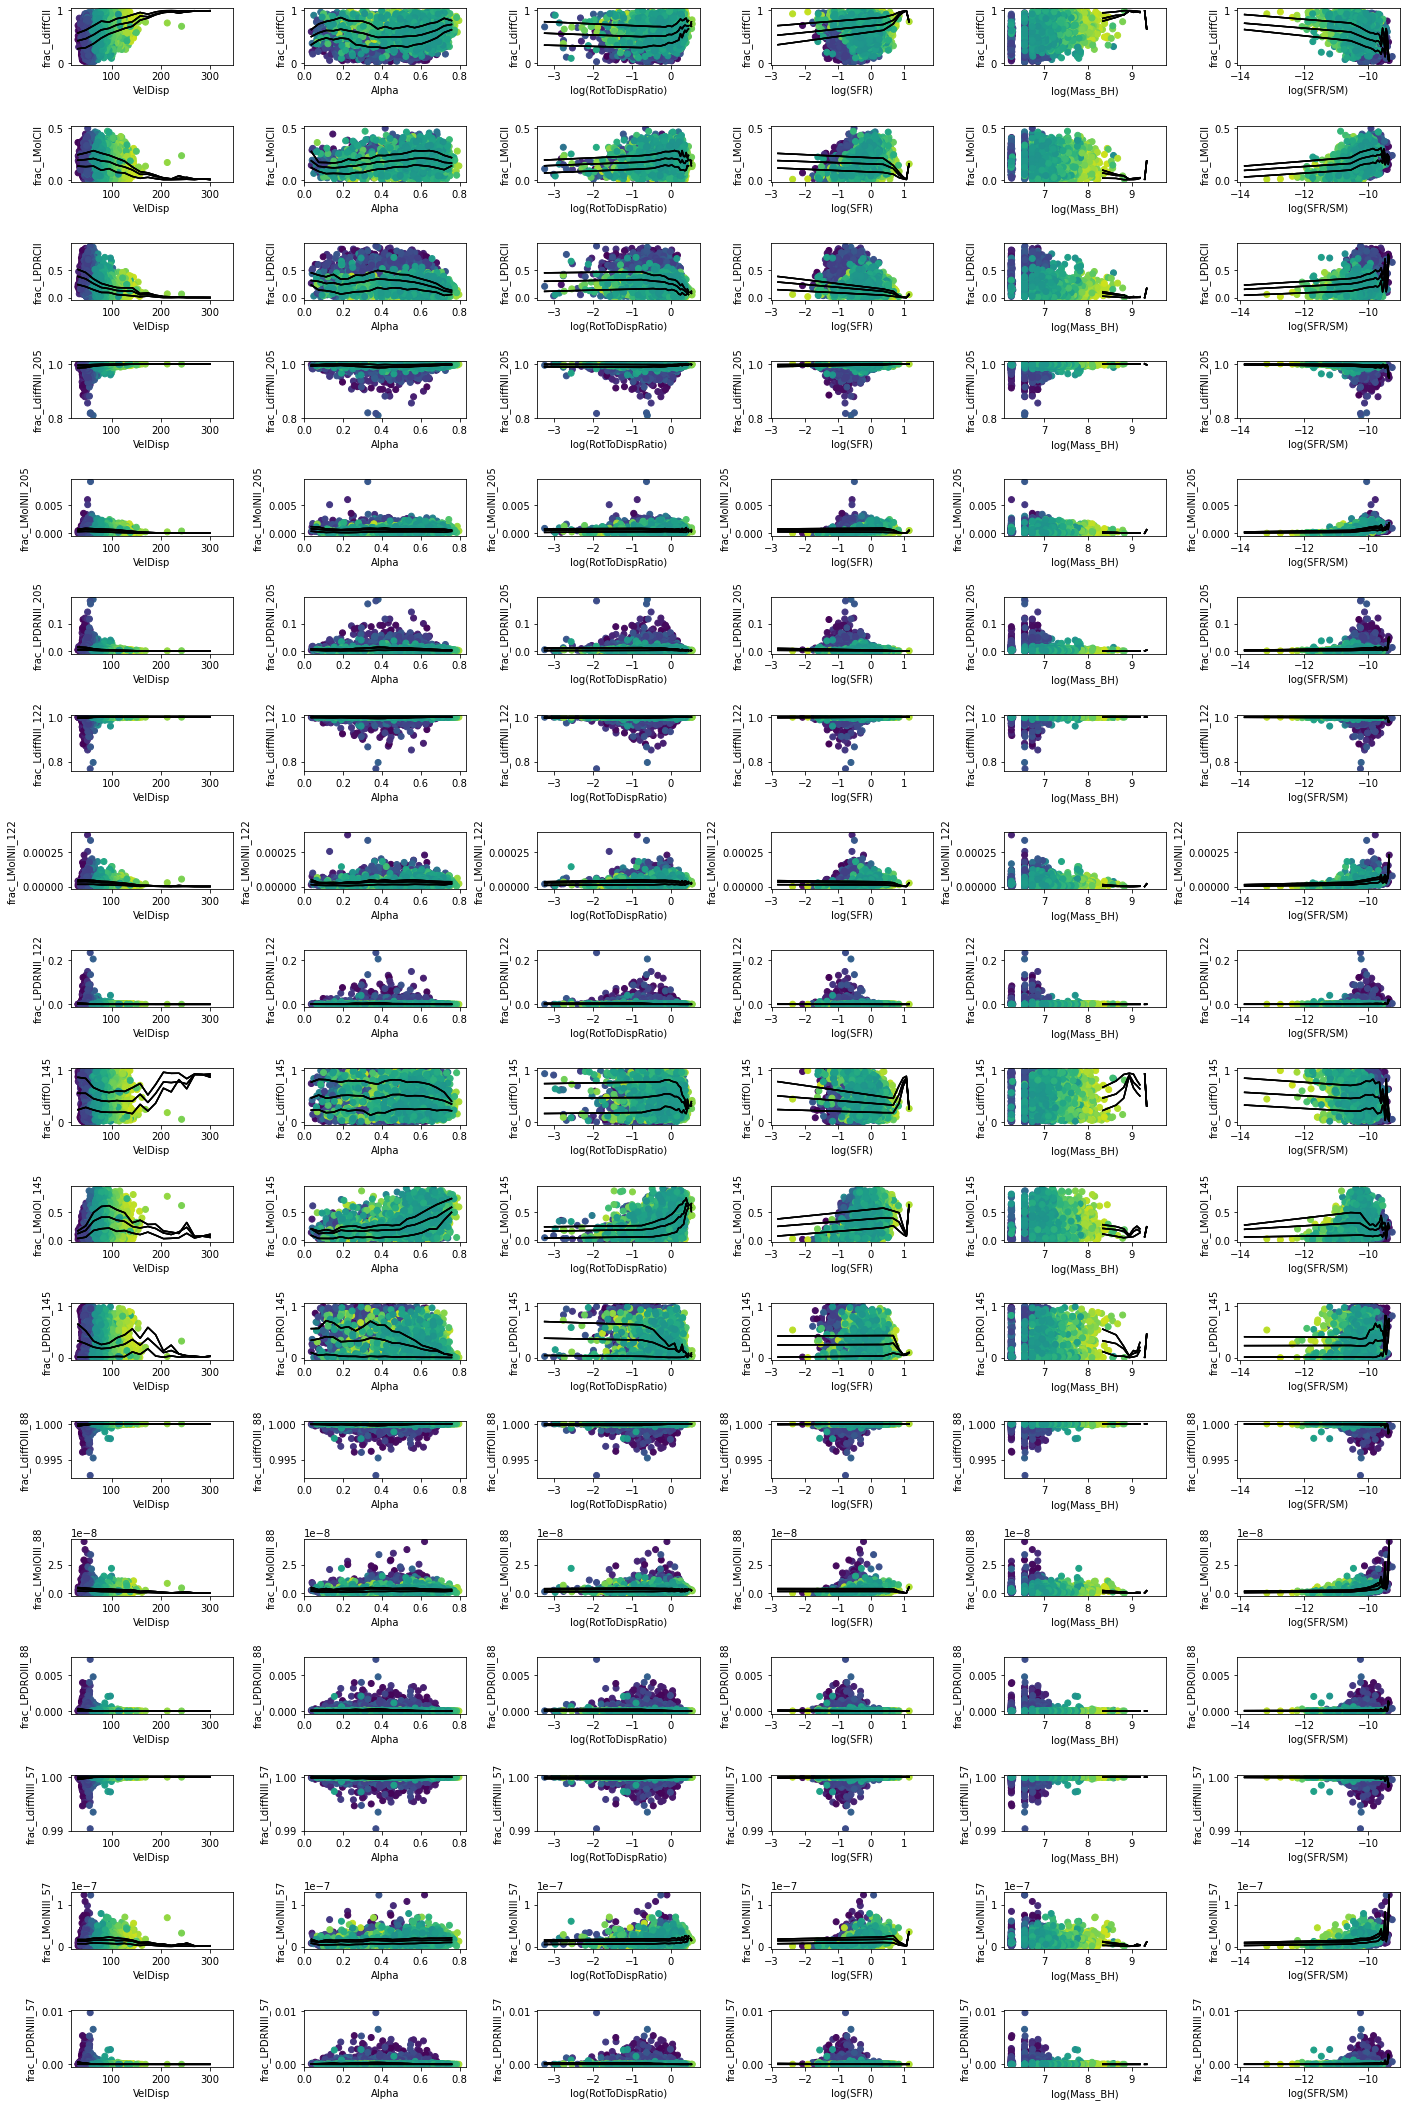

In [41]:
fig, ax = plt.subplots(18,6,figsize=(20,30), facecolor= 'white')
fig.tight_layout(pad=4)

for i_grp, grp in enumerate([grupo1, grupo2, grupo3]):
    for i_lp,lparam in enumerate(luparam):
        for i_m, mparam in enumerate(mkparam0): 
#       ax[i_m,i_lp].scatter(mk_lu[mparam][grp],mk_lu[lparam][grp],color=cparam, marker=markers[i_grp])
            ax[i_lp,i_m].scatter(mk_lu[mparam][grp],mk_lu[lparam][grp],
                                 c=mk_lu['logMStar'][grp], vmin=9, vmax=11, cmap='viridis')
            ax[i_lp,i_m].plot(edges[i_lp][i_m][:-1],means[i_lp][i_m], color='black')
            ax[i_lp,i_m].plot(edges[i_lp][i_m][:-1],per25[i_lp][i_m], color='black')
            ax[i_lp,i_m].plot(edges[i_lp][i_m][:-1],per75[i_lp][i_m], color='black')
            ax[i_lp,i_m].set_xlabel(mparam)
            ax[i_lp,i_m].set_ylabel(lparam)

    
    for i_lp, lparam in enumerate(luparam):
        for i_m, mparam in enumerate(mkparam, start=2): 
#           ax[i_m,i_lp].scatter(np.log10(mk_lu[mparam][grp]),mk_lu[lparam][grp],color=cparam, marker=markers[i_grp])
            ax[i_lp,i_m].scatter(np.log10(mk_lu[mparam][grp]),mk_lu[lparam][grp],
                                  c=mk_lu['logMStar'][grp], vmin=9, vmax=11, cmap='viridis')
            ax[i_lp,i_m].plot(np.log10(edges[i_lp][i_m][:-1]),means[i_lp][i_m], color='black')
            ax[i_lp,i_m].plot(np.log10(edges[i_lp][i_m][:-1]),per25[i_lp][i_m], color='black')
            ax[i_lp,i_m].plot(np.log10(edges[i_lp][i_m][:-1]),per75[i_lp][i_m], color='black')
            ax[i_lp,i_m].set_xlabel("log("+mparam+")")
            ax[i_lp,i_m].set_ylabel(lparam)




In [ ]:
os.chdir(r'../Analysis')
fig.savefig('ism.pdf')

In [ ]:
df = pd.DataFrame()
#df['GalaxyID']=mk_lu['GalaxyID']
#df['GalID']=mk_lu['GalID']
df['VelDisp']=mk_lu['VelDisp']
df['Alpha']=mk_lu['Alpha']
df['log(RotToDispRatio)']=np.log10(mk_lu['RotToDispRatio'])
df['log(SFR/SM)']=np.log10(mk_lu['SFR/SM'])
df['log(SFR)']=np.log10(mk_lu['SFR'])
df['log(Mass_BH)']=np.log10(mk_lu['Mass_BH'])
df['frac_LdiffCII']=mk_lu['frac_LdiffCII']
df['frac_LMolCII']=mk_lu['frac_LMolCII']
df['frac_LPDRCII']=mk_lu['frac_LPDRCII']
df['frac_LdiffNII_205']=mk_lu['frac_LdiffNII_205']
df['frac_LMolNII_205']=mk_lu['frac_LMolNII_205']
df['frac_LPDRNII_205']=mk_lu['frac_LPDRNII_205']
df['frac_LdiffNII_122']=mk_lu['frac_LdiffNII_122']
df['frac_LMolNII_122']=mk_lu['frac_LMolNII_122']
df['frac_LPDRNII_122']=mk_lu['frac_LPDRNII_122']
df['frac_LdiffOI_145']=mk_lu['frac_LdiffOI_145']
df['frac_LMolOI_145']=mk_lu['frac_LMolOI_145']
df['frac_LPDROI_145']=mk_lu['frac_LPDROI_145']
df['frac_LdiffOIII_88']=mk_lu['frac_LdiffOIII_88']
df['frac_LMolOIII_88']=mk_lu['frac_LMolOIII_88']
df['frac_LPDROIII_88']=mk_lu['frac_LPDROIII_88']
df['frac_LdiffNIII_57']=mk_lu['frac_LdiffNIII_57']
df['frac_LMolNIII_57']=mk_lu['frac_LMolNIII_57']
df['frac_LPDRNIII_57']=mk_lu['frac_LPDRNIII_57']



df[grupo1].corr(method='spearman')

In [ ]:
df[grupo2].corr(method='spearman')

In [ ]:
df[grupo3].corr(method='spearman')

In [ ]:
number_column = df.loc[:,'SFR']
masa=number_column.values
number_column2 = df.loc[:,'logLOIII_88']
luz=number_column2.values
x=masa.reshape((-1, 1))
y=luz
model = LinearRegression().fit(np.log10(x), y)
r_sq = model.coef_
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)

In [ ]:
reg = RandomForestRegressor(max_depth=2000, random_state=42, n_estimators=1000)
reg.fit(df[['logLCII','logLNII_205','logLOI_145','logLOIII_88']],df['VelDisp'])

In [ ]:
y_pred =reg.predict(df[['logLCII','logLNII_205','logLOI_145','logLOIII_88']])

In [ ]:
plt.scatter(df['VelDisp'], y_pred)
plt.plot([0,350],[0,350])